<a href="https://colab.research.google.com/github/Bsubhiyah/Happiness-World-Report-2019-Project/blob/master/Happiness_final_capstone_subhiyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The main modules of this analysis are as follows:

<ol>
<li>Loading data from csv file for analysis</li>
<li>Histogram of each feature</li>
<li>Dividng data into different regions on the base of happiness score</li>    
<li>Grouping of countries on the base of Happiness Score</li>
<li>Bar Plots representing the distribution of happiness score</li>    
<li>Box Plots representing the distribution of each feature in different score groups</li>
<li>Statistical Analysis of features of each region</li>
<li>Pairwise Scatter Plots</li>
    <li>Correlation between features and happiness score</li>
</ol>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1. Loading data from csv file for analysis

In [0]:
#link to original source for dataset https://www.kaggle.com/unsdsn/world-happiness#2019.csv
data = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/2019.csv')
data.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


<b>Print information/stats of whole dataset</b>

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


It is evident from the above mentioned stats that there is no null or missing value in the dataset.

### 2. Histograms for each feature

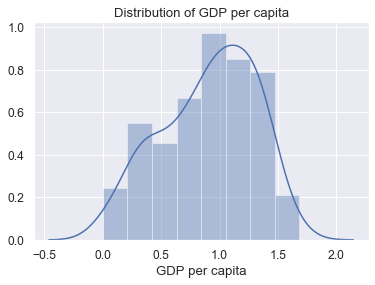

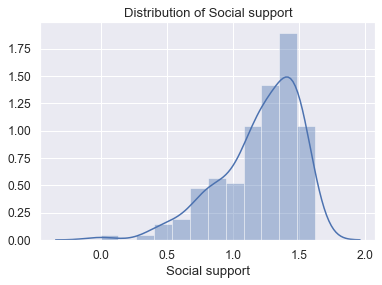

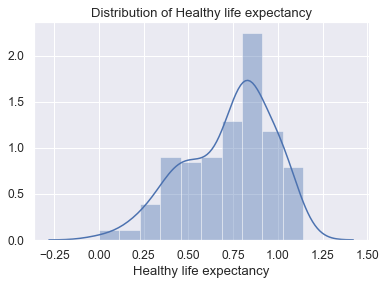

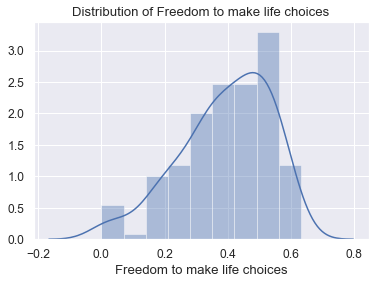

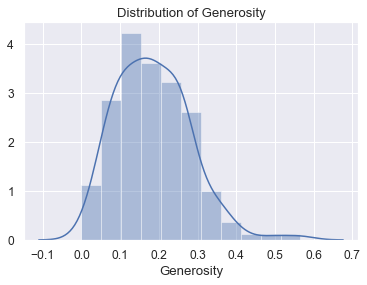

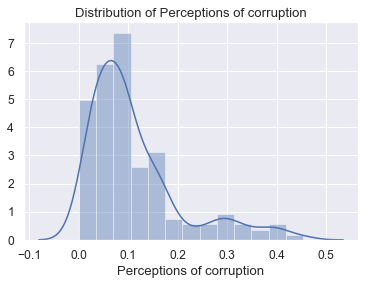

In [0]:
sns.set(font_scale=1.1)

cols = ['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
        'Perceptions of corruption']
for element in cols:
    sns.distplot( data[element] )
    plt.xlabel(element)
    plt.title("Distribution of "+element)
    plt.show()

For the better analysis of happiness score, the data of countries will be divided into 7 regions on the basis of happiness score.

### 3. Dividng data into different regions on the base of happiness score

<b> Add a column with name "score range" </b>

In [0]:
regions = list()
scores = data.iloc[:,2]
for score in scores:
    if score >= 7:
        regions.append("7+")
    elif score >= 6:
        regions.append("6-7")
    elif score >= 5:
        regions.append("5-6")
    elif score >= 4:
        regions.append("4-5")
    elif score >= 3:
        regions.append("3-4")
    elif score >= 2:
        regions.append("2-3")

data['Score Range'] = regions
data.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score Range
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7+
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7+
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7+
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7+
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7+
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,7+
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,7+
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,7+
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,7+
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,7+


### 4. Grouping of countries on the base of Happiness Score

In [0]:
temp = data.groupby('Score Range')
temp.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score Range
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7+
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7+
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7+
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7+
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7+
16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,6-7
17,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,6-7
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,6-7
19,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,6-7
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,6-7


In [0]:
regs = list()
data = data[data.columns[1:]]

reg1 = data[data['Score Range'] == '7+']
regs.append(reg1)

reg2 = data[data['Score Range'] == '6-7']
regs.append(reg2)

reg3 = data[data['Score Range'] == '5-6']
regs.append(reg3)

reg4 = data[data['Score Range'] == '4-5']
regs.append(reg4)

reg5 = data[data['Score Range'] == '3-4']
regs.append(reg5)

reg6 = data[data['Score Range'] == '2-3']
regs.append(reg6)


### 5. Bar Plots representing the distribution of happiness score

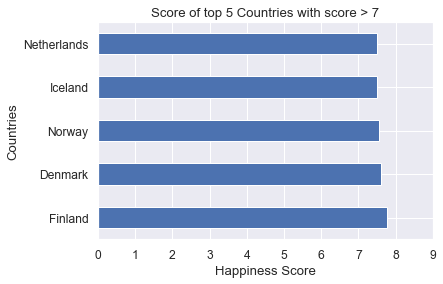

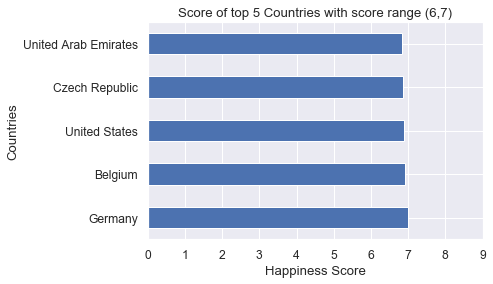

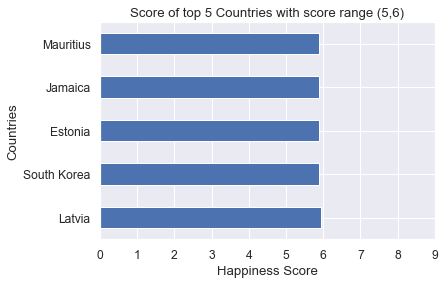

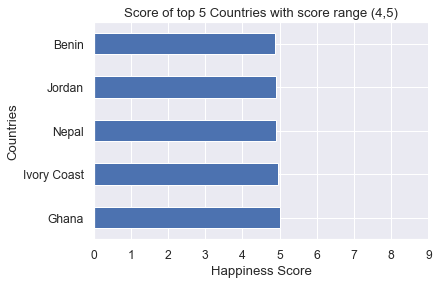

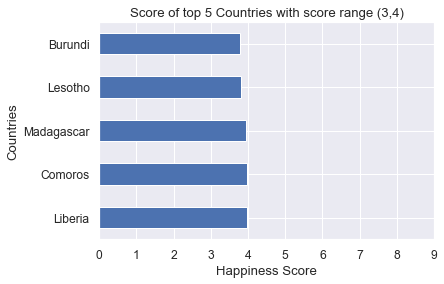

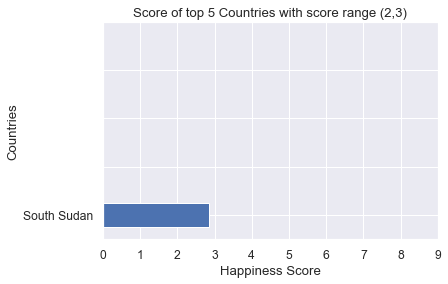

In [0]:
count = 7
for element in regs:
    element['Score'].head(5).plot(xticks=np.arange(10), kind='barh')
    lab = element['Country or region'][:5]
    plt.yticks(np.arange(5), lab)
    plt.xlabel("Happiness Score")
    plt.ylabel("Countries")
    if count == 7:
        plt.title('Score of top 5 Countries with score > 7')
    else:
        temp = "("+str(count)+","+str(count+1)+")"
        plt.title('Score of top 5 Countries with score range '+temp)
    count-=1
    plt.show()

### 6. Box Plots representing the distribution of each feature in different score groups

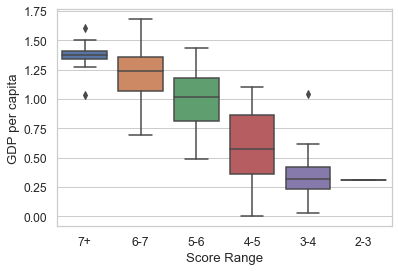

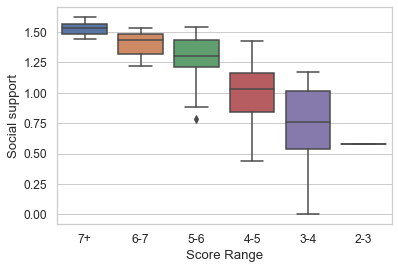

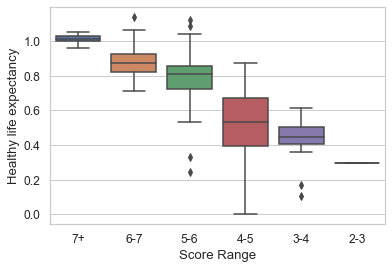

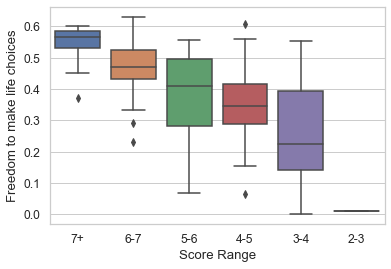

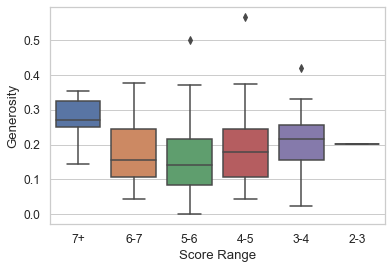

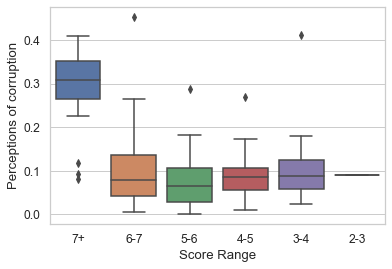

In [0]:
columns = ['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 
             'Generosity', 'Perceptions of corruption']
for col in columns:
    sns.set_style("whitegrid") 
    sns.boxplot(x ='Score Range', y = col , data = data) 
    plt.show()

### 7. Statistical Analysis of features of each region

<b>Region 1 with happiness score greater than 7</b>

In [0]:
reg1.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,7.328625,1.374562,1.528250,1.013250,0.547750,0.269875,0.284938
std,0.216533,0.122165,0.051615,0.022758,0.061095,0.063654,0.104038
min,7.021000,1.034000,1.441000,0.963000,0.371000,0.144000,0.082000
25%,7.160000,1.338250,1.485000,0.998250,0.530500,0.250000,0.265000
50%,7.292500,1.378000,1.532000,1.014000,0.565000,0.269000,0.309000
75%,7.489500,1.410000,1.561000,1.028250,0.586500,0.324000,0.350500
max,7.769000,1.609000,1.624000,1.052000,0.603000,0.354000,0.410000


<b>Region 2 with happiness score between 6 and 7</b>

In [0]:
reg2.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,6.340889,1.196972,1.403778,0.887194,0.465667,0.172139,0.102444
std,0.282504,0.235177,0.094181,0.099345,0.086418,0.087235,0.089517
min,6.008000,0.694000,1.223000,0.713000,0.231000,0.043000,0.005000
25%,6.123250,1.065000,1.322000,0.823250,0.432250,0.106500,0.041750
50%,6.257500,1.242000,1.435000,0.872500,0.472000,0.155500,0.078500
75%,6.444500,1.357500,1.478750,0.928250,0.526000,0.245250,0.136500
max,6.985000,1.684000,1.529000,1.141000,0.631000,0.375000,0.453000


<b>Region 3 with happiness score between 5 and 6</b>

In [0]:
reg3.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,5.486089,0.988022,1.296911,0.788756,0.373800,0.158244,0.075689
std,0.272173,0.226130,0.172986,0.164573,0.130074,0.095124,0.059684
min,5.011000,0.493000,0.782000,0.245000,0.067000,0.000000,0.000000
25%,5.261000,0.813000,1.209000,0.723000,0.282000,0.083000,0.028000
50%,5.432000,1.015000,1.303000,0.808000,0.410000,0.142000,0.064000
75%,5.718000,1.181000,1.431000,0.854000,0.495000,0.215000,0.106000
max,5.940000,1.438000,1.538000,1.122000,0.558000,0.498000,0.287000


<b>Region 4 with happiness score between 4 and 5</b>

In [0]:
reg4.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,4.533512,0.608326,1.006488,0.529070,0.348953,0.183721,0.089791
std,0.244575,0.291023,0.221004,0.200076,0.118281,0.096130,0.048411
min,4.015000,0.000000,0.437000,0.000000,0.066000,0.043000,0.010000
25%,4.370000,0.365000,0.841500,0.393500,0.287500,0.108000,0.055000
50%,4.519000,0.578000,1.033000,0.532000,0.346000,0.178000,0.085000
75%,4.703500,0.864500,1.158000,0.674500,0.416000,0.243500,0.107500
max,4.996000,1.100000,1.427000,0.874000,0.609000,0.566000,0.270000


<b>Region 5 with happiness score between 3 and 4</b>

In [0]:
reg5.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.553933,0.346267,0.758133,0.429867,0.258467,0.206533,0.109933
std,0.290581,0.253662,0.337800,0.136018,0.177603,0.097193,0.094398
min,3.083000,0.026000,0.000000,0.105000,0.000000,0.025000,0.025000
25%,3.357000,0.232500,0.538500,0.406500,0.142500,0.154500,0.059000
50%,3.488000,0.323000,0.757000,0.449000,0.225000,0.217000,0.089000
75%,3.788500,0.421000,1.018000,0.502000,0.393500,0.255000,0.125500
max,3.975000,1.041000,1.169000,0.614000,0.555000,0.419000,0.411000


<b>Region 6 with happiness score between 2 and 3</b>

In [0]:
reg6.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,1.000,1.000,1.000,1.000,1.00,1.000,1.000
mean,2.853,0.306,0.575,0.295,0.01,0.202,0.091
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.853,0.306,0.575,0.295,0.01,0.202,0.091
25%,2.853,0.306,0.575,0.295,0.01,0.202,0.091
50%,2.853,0.306,0.575,0.295,0.01,0.202,0.091
75%,2.853,0.306,0.575,0.295,0.01,0.202,0.091
max,2.853,0.306,0.575,0.295,0.01,0.202,0.091


### 8. Pairwise Scatter Plots

<b>Scatter plots of countries of all data</b>

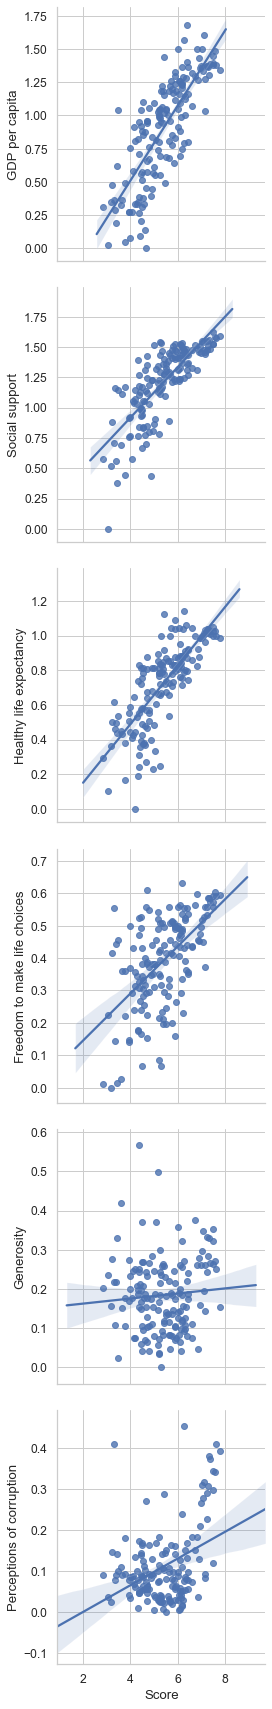

In [0]:
sns.pairplot(data=data, kind='reg', height = 4, 
                  x_vars=['Score'],
                  y_vars=['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 
             'Generosity', 'Perceptions of corruption'])

It is visible from scatter plots that GDP per capita, healthy life expectancy and social support are very positively correlated with the happiness score. However, perceptions of corruption has positive correlation but its not very high. Furthermore, generosity has almost no impact on the happiness score.

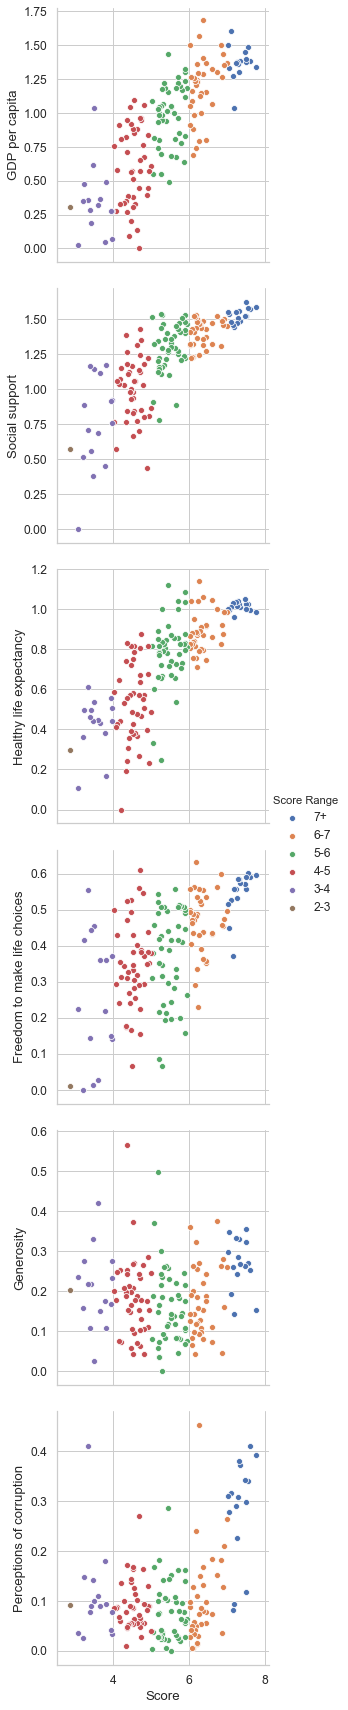

In [0]:
sns.pairplot(data=data, height = 4, hue='Score Range',
                  x_vars=['Score'],
                  y_vars=['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 
             'Generosity', 'Perceptions of corruption'])

### 9. Correlation between features and happiness score

In [0]:
data.corr(method="pearson", min_periods=20)["Score"].abs().sort_values(ascending=False)

Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64

<b>Heatmap between features</b>

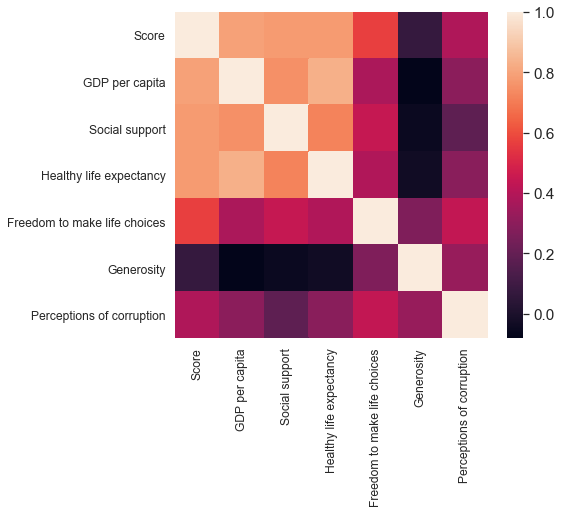

In [0]:
data = data[['Score','GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices',  'Generosity', 'Perceptions of corruption']]
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
sns.set(font_scale=1.4)
ax=sns.heatmap(data.corr())

It can be observed from the above data analysis that our hypothesis which states that healthy life expectancy and GDP per capita are strongly correlated with happiness score are true. However, the statement that Generosity has no impact on the happiness score is also true.